In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('payments.csv')

In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
data.shape

(6362620, 11)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [26]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [27]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

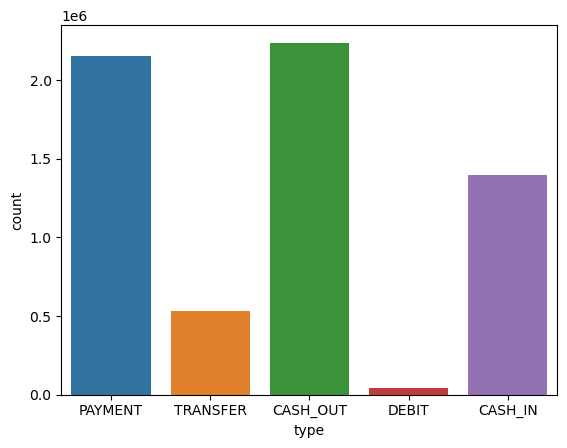

In [28]:
sns.countplot(x='type', data=data)

In [29]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

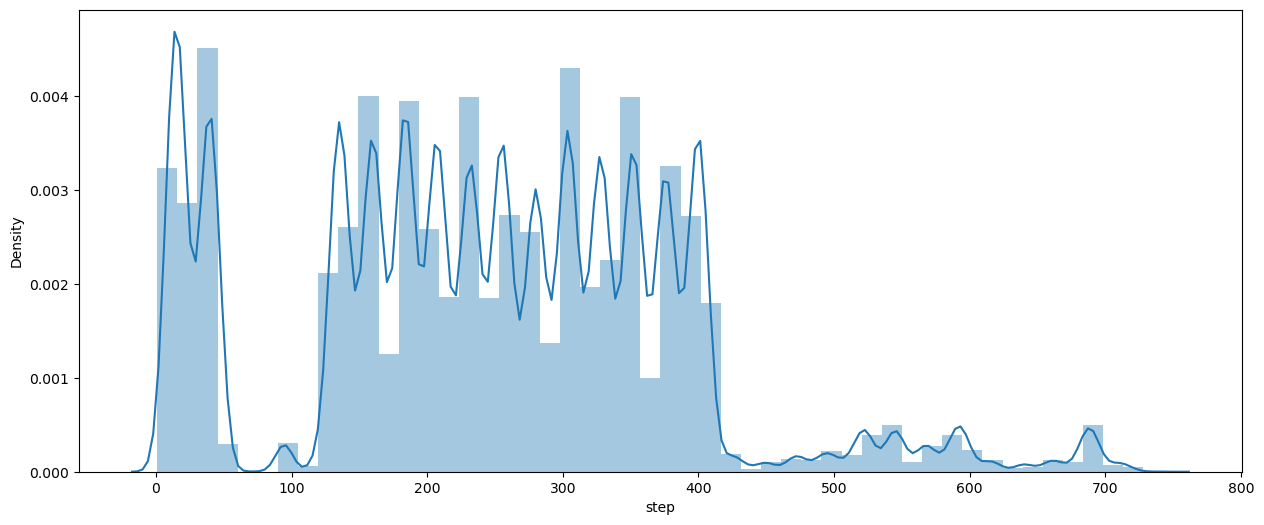

In [30]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
lc=LabelEncoder()

In [41]:
data1=data.copy()

In [42]:
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [43]:
data1['type'] = lc.fit_transform(data1['type'])
data1['nameOrig'] = lc.fit_transform(data1['nameOrig'])
data1['nameDest'] = lc.fit_transform(data1['nameDest'])

In [44]:
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


<Axes: >

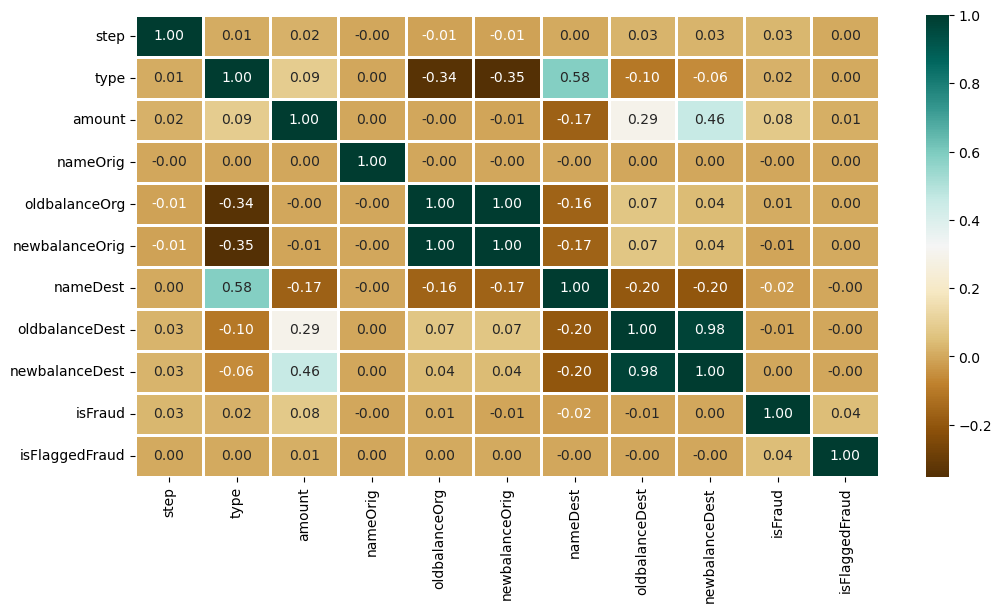

In [45]:
plt.figure(figsize=(12, 6))
sns.heatmap(data1.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [46]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [47]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [48]:
X.shape

(6362620, 11)

In [49]:
y.shape

(6362620,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Model Training

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model1=lr=LogisticRegression(random_state=0)

In [53]:
model1.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [54]:
pred1=model1.predict(X_test)

In [58]:
matrix1 = confusion_matrix(pred1, y_test)
a_score1 = accuracy_score(pred1, y_test)

In [59]:
matrix1

array([[1904535,    1380],
       [   1816,    1055]], dtype=int64)

In [60]:
a_score1

0.9983256373422689

## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model2=DecisionTreeClassifier(random_state=0)

In [63]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
pred2 = model2.predict(X_test)

In [65]:
matrix2 = confusion_matrix(pred2, y_test)
a_score2 = accuracy_score(pred2, y_test)

In [66]:
matrix2

array([[1906095,     298],
       [    256,    2137]], dtype=int64)

In [67]:
a_score2

0.9997097631688413

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model3=RandomForestClassifier(n_estimators=9,random_state=0)

In [70]:
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=9, random_state=0)

In [71]:
pred3 = model3.predict(X_test)

In [72]:
matrix3 = confusion_matrix(pred3, y_test)
a_score3 = accuracy_score(pred3, y_test)

In [73]:
matrix3

array([[1906291,     498],
       [     60,    1937]], dtype=int64)

In [74]:
a_score3

0.9997076675960532

In [76]:
print(a_score1)
print(a_score2)
print(a_score3)

0.9983256373422689
0.9997097631688413
0.9997076675960532


Comaparing the three models decision tree has more accuracy so we consider it for further processiong